In [2]:
import os
import numpy as np
from tools import analysistools as atools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [197]:
basedir = "/Volumes/LaCie/clus/rebuilds"
tPaths = filter(lambda x: 'out.csv' in x and not '._' in x,os.listdir(basedir))
cdf = pd.DataFrame.from_csv('/Volumes/LaCie/clus/coverage.csv',index_col=None)
bdf = pd.DataFrame.from_csv('/Volumes/LaCie/clus/budtime.csv')
budNames = bdf[bdf.budtime>0]['name'].values
nonbudNames = bdf[bdf.budtime<0]['name'].values

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


In [4]:
# msdf = pd.DataFrame(columns = ['timestep'])
# for f in tPaths:
#     df = pd.DataFrame.from_csv(os.path.join(basedir,f),index_col=None)
#     oPos = df[(df.type == 2) & (df.timestep == 0)][['x','y','z']].values[-1]
#     if len(msdf['timestep'].values) < 1:
#         msdf['timestep'] = df['timestep'].unique()
#     msdf[f.split('.')[0]] = df[df.type == 2].apply(lambda r: float((r['x']-oPos[0])**2.0 + (r['y']-oPos[1])**2.0 + (r['z']-oPos[2])**2.0), axis=1).values
# msdf.to_csv('/Volumes/LaCie/clus/msd.csv',index=False)

In [220]:
sample = random.sample(budNames,10)
sample += random.sample(nonbudNames,10)

In [10]:
msdf = pd.DataFrame.from_csv('/Volumes/LaCie/clus/msd.csv',index_col=None)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


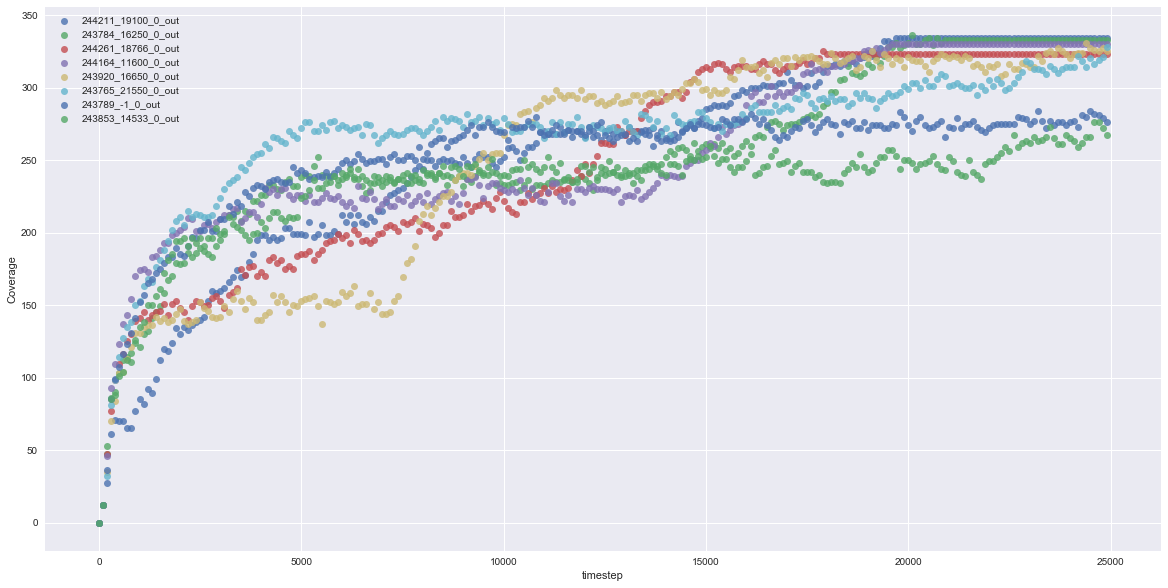

In [228]:
fig = plt.figure(figsize=(20,10))
cols = msdf.columns.difference(['timestep'])
s = cols
for c in sample:
    if c in cdf:
        sns.regplot(y=c, x="timestep", data=cdf,fit_reg=False,label=c)

plt.ylabel('Coverage')
plt.legend()
plt.show()

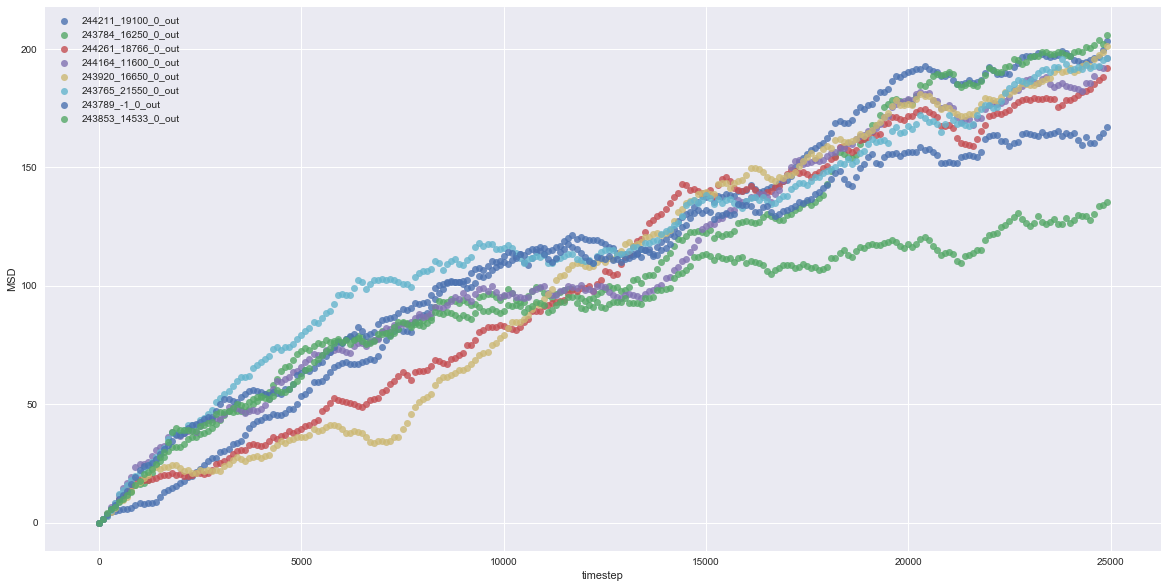

In [227]:
fig = plt.figure(figsize=(20,10))
cols = msdf.columns.difference(['timestep'])
s = cols
# color='orange' if bdf[bdf.name==c]['budtime'].values[0] == -1 else 'blue'
for c in sample:
    if c in cdf:
        sns.regplot(y=c, x="timestep", data=msdf,fit_reg=False,label=c)

plt.ylabel('MSD')
plt.legend()
plt.show()

In [20]:
budNames = bdf[bdf.budtime>0]['name'].values
nonbudNames = bdf[bdf.budtime<0]['name'].values

In [47]:
avgmsdf = pd.DataFrame()
avgmsdf['timestep'] = msdf['timestep']
avgmsdf['budding'] = msdf.drop(['timestep'], axis=1)[budNames].mean(axis=1)
avgmsdf['non_budding'] = msdf.drop(['timestep'], axis=1)[nonbudNames].mean(axis=1)

avgmsdf.to_csv('/Volumes/LaCie/clus/avgmsd.csv',index=None)

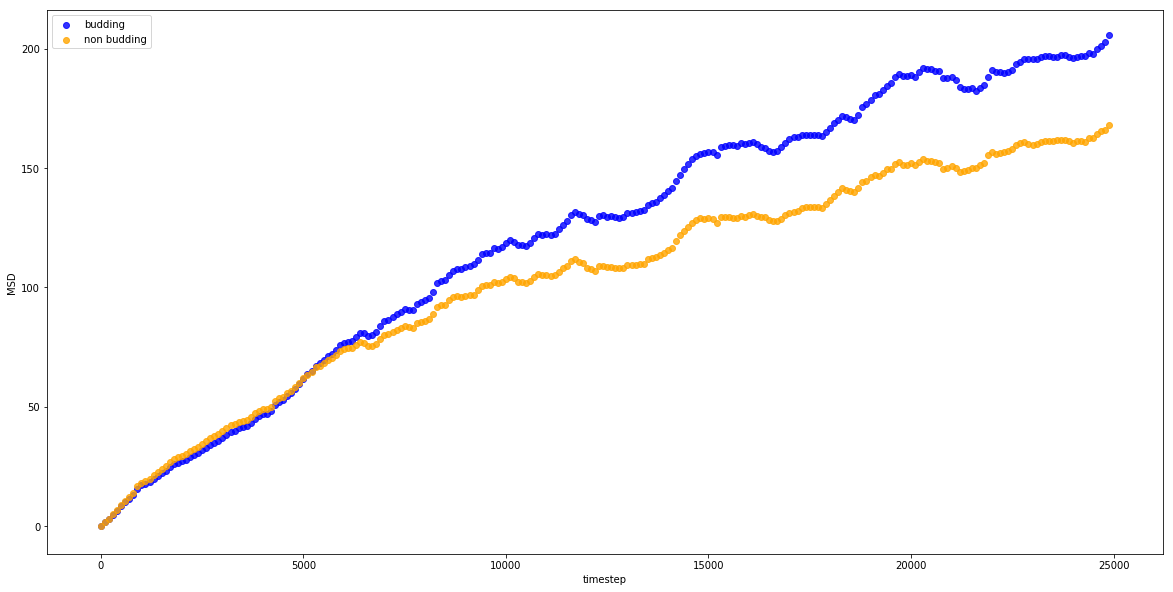

In [78]:
fig = plt.figure(figsize=(20,10))


sns.regplot(y='budding', x="timestep", data=avgmsdf,fit_reg=False,color='blue',label='budding')
sns.regplot(y='non_budding', x="timestep", data=avgmsdf,fit_reg=False,color='orange',label='non budding')


plt.ylabel('Ensemble Average MSD')
plt.legend()
plt.show()


In [76]:
rmsdf = pd.DataFrame(columns = ['timestep'])
for f in tPaths:
    df = pd.DataFrame.from_csv(os.path.join(basedir,f),index_col=None)
    corePos = df[(df.type == 2) & (df.timestep == 0)][['x','y','z']].values[-1]
    lPos = df[(df.type == 3) & (df.timestep == 0)][['x','y','z']].values[-1]
    oPos = lPos - corePos
    if len(rmsdf['timestep'].values) < 1:
        rmsdf['timestep'] = df['timestep'].unique()
    coreSeries = df[df.type == 2][['x','y','z']].values
    lSeries = df[df.type == 3][['x','y','z']].values
    rSeries = lSeries-coreSeries
    rSeries = [i-oPos for i in rSeries]
    rmsdSeries = [i[0]**2.0 + i[1]**2.0 + i[2]**2.0 for i in rSeries]
    rmsdf[f.split('.')[0]] = rmsdSeries
rmsdf.to_csv('/Volumes/LaCie/clus/rmsd.csv',index=False)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


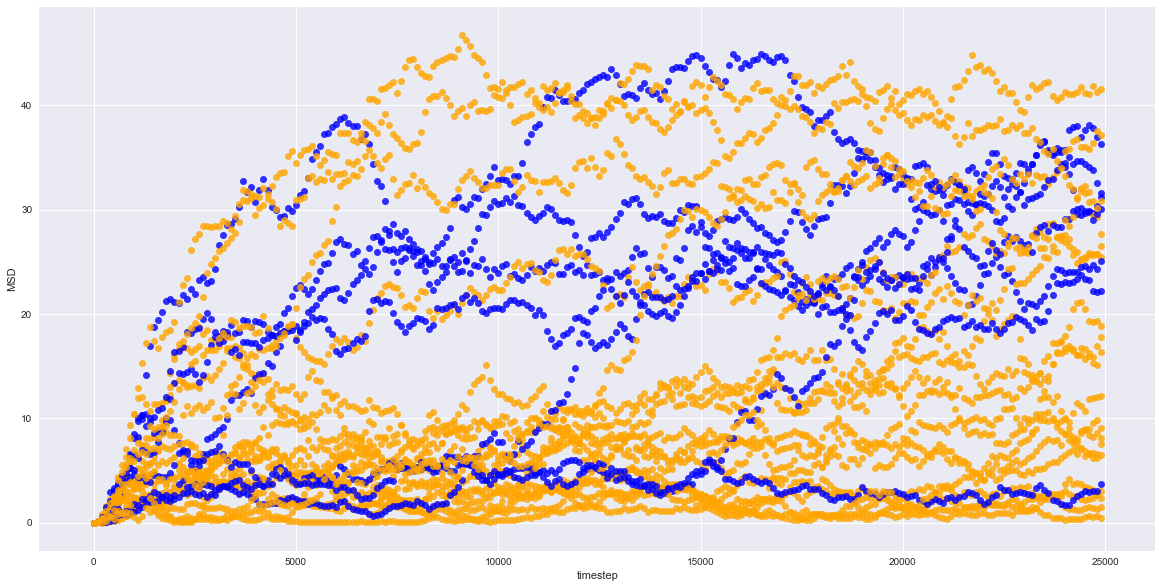

In [213]:
fig = plt.figure(figsize=(20,10))
cols = rmsdf.columns.difference(['timestep'])
s = cols
for c in random.sample(s,25):
    sns.regplot(y=c, x="timestep", data=rmsdf,fit_reg=False,color='orange' if bdf[bdf.name==c]['budtime'].values[0] == -1 else 'blue')

plt.ylabel('MSD')
plt.legend()
plt.show()

In [79]:
avgrmsdf = pd.DataFrame()
avgrmsdf['timestep'] = rmsdf['timestep']
avgrmsdf['budding'] = rmsdf.drop(['timestep'], axis=1)[budNames].mean(axis=1)
avgrmsdf['non_budding'] = rmsdf.drop(['timestep'], axis=1)[nonbudNames].mean(axis=1)

avgrmsdf.to_csv('/Volumes/LaCie/clus/avgrmsd.csv',index=None)

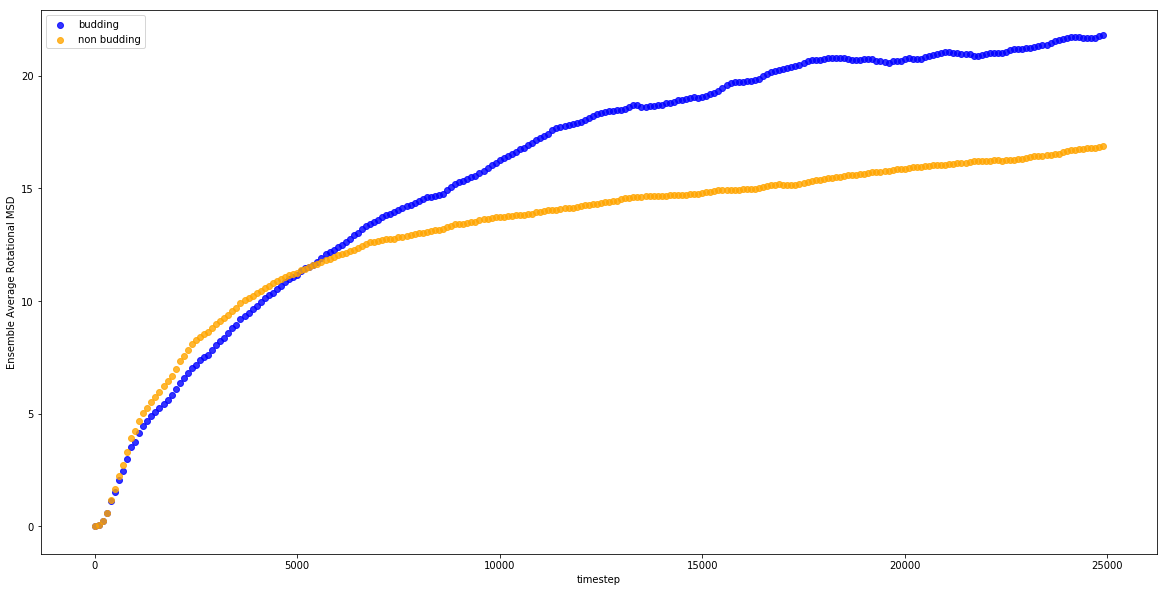

In [125]:
fig = plt.figure(figsize=(20,10))


# sns.jointplot(x=avgrmsdf["timestep"], y=avgrmsdf["budding"], kind='reg',fit_reg=False)
# # sns.jointplot(x=avgrmsdf["timestep"], y=avgrmsdf["non_budding"], kind='scatter')

sns.regplot(y='budding', x="timestep",  data=avgrmsdf,fit_reg=False,color='blue',label='budding')
sns.regplot(y='non_budding', x="timestep",  data=avgrmsdf,fit_reg=False,color='orange',label='non budding')

plt.ylabel('Ensemble Average Rotational MSD')
plt.legend()
plt.show()

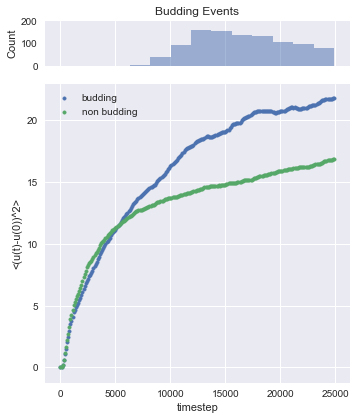

In [232]:
fig = plt.figure(figsize=(20,20))

graph = sns.JointGrid(x=avgrmsdf.timestep, y=avgrmsdf.budding,space=1.0)

sns.set()

graph.plot_joint(plt.scatter, marker='.', s=50,label='budding')
graph.x = avgrmsdf.timestep
graph.y = avgrmsdf.non_budding
graph.plot_joint(plt.scatter, marker='.', s=50,label='non budding')

graph.ax_marg_x.hist(
    bdf[bdf.budtime > 0]['budtime'],
    alpha = 0.5,
    )


graph.ax_marg_y.set_visible(False)

graph.ax_marg_x.set_ylabel("Count")
graph.ax_marg_x.set_title("Budding Events")
graph.ax_marg_x.set_ylim(0,200)


for tick in graph.ax_marg_x.get_yticklabels():
    tick.set_visible(True)

plt.ylabel("<(u(t)-u(0))^2>")
plt.legend()
plt.tight_layout()
plt.savefig('/Volumes/LaCie/clus/rmsd.eps', format='eps')
plt.show()


In [190]:
cBud = []
cNBud = []
for c in cdf.columns:
    if c in budNames:
        cBud.append(c)
    elif c in nonbudNames:
        cNBud.append(c)
        

In [205]:
meancdf = pd.DataFrame()
meancdf['timestep'] = cdf['timestep']
meancdf['budding'] = cdf.drop('timestep',axis=1)[cBud].mean(axis=1)
meancdf['non_budding'] = cdf.drop('timestep',axis=1)[cNBud].mean(axis=1)


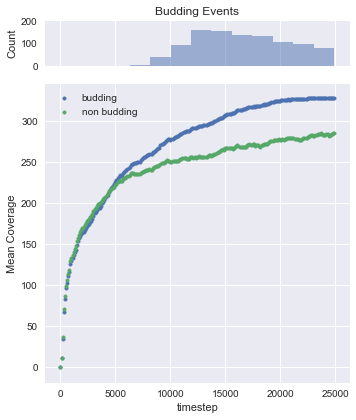

In [233]:
fig = plt.figure(figsize=(20,20))

graph = sns.JointGrid(x=meancdf.timestep, y=meancdf.budding,space=1.0)

sns.set()

graph.plot_joint(plt.scatter, marker='.', s=50,label='budding')
graph.x = meancdf.timestep
graph.y = meancdf.non_budding
graph.plot_joint(plt.scatter, marker='.', s=50,label='non budding')

graph.ax_marg_x.hist(
    bdf[bdf.budtime > 0]['budtime'],
    alpha = 0.5,
    )


graph.ax_marg_y.set_visible(False)

graph.ax_marg_x.set_ylabel("Count")
graph.ax_marg_x.set_title("Budding Events")
graph.ax_marg_x.set_ylim(0,200)


for tick in graph.ax_marg_x.get_yticklabels():
    tick.set_visible(True)

plt.ylabel("Mean Coverage")
plt.legend()
plt.tight_layout()
plt.savefig('/Volumes/LaCie/clus/coverage.eps', format='eps')
plt.show()

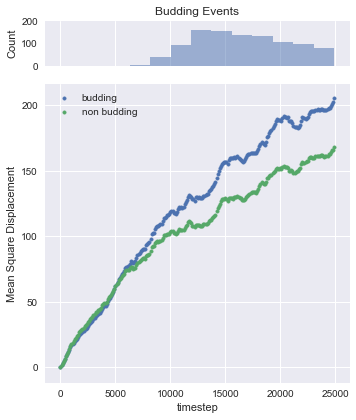

In [234]:
fig = plt.figure(figsize=(20,20))

graph = sns.JointGrid(x=avgmsdf.timestep, y=avgmsdf.budding,space=1.0)

sns.set()

graph.plot_joint(plt.scatter, marker='.', s=50,label='budding')
graph.x = avgmsdf.timestep
graph.y = avgmsdf.non_budding
graph.plot_joint(plt.scatter, marker='.', s=50,label='non budding')

graph.ax_marg_x.hist(
    bdf[bdf.budtime > 0]['budtime'],
    alpha = 0.5,
    )

graph.ax_marg_y.set_visible(False)
graph.ax_marg_x.set_ylabel("Count")
graph.ax_marg_x.set_title("Budding Events")
graph.ax_marg_x.set_ylim(0,200)

for tick in graph.ax_marg_x.get_yticklabels():
    tick.set_visible(True)

plt.ylabel("Mean Square Displacement")
plt.legend()
plt.tight_layout()
plt.savefig('/Volumes/LaCie/clus/msd.eps', format='eps')
plt.show()